In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("/kaggle/input/playground-series-s5e10/train.csv")
df_test  = pd.read_csv("/kaggle/input/playground-series-s5e10/test.csv")

In [3]:
df_train.head(10)


,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56
5,5,highway,3,0.54,70,night,foggy,True,False,morning,False,True,0,0.61
6,6,highway,1,0.04,45,night,foggy,False,True,morning,True,False,2,0.20
7,7,highway,2,0.33,45,daylight,clear,False,True,evening,False,True,0,0.16
8,8,rural,3,0.63,25,dim,clear,True,False,evening,True,True,2,0.18
9,9,urban,4,0.38,45,dim,clear,True,True,afternoon,True,True,2,0.15


In [4]:
df_test.head()


,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


In [5]:
df_train.shape

(517754, 14)

In [6]:
df_test.shape

(172585, 13)

In [7]:
df_train.columns



Index(['id', 'road_type', 'num_lanes', 'curvature', 'speed_limit', 'lighting',
       'weather', 'road_signs_present', 'public_road', 'time_of_day',
       'holiday', 'school_season', 'num_reported_accidents', 'accident_risk'],
      dtype='object')

In [ ]:
df_test.columns

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172585 entries, 0 to 172584
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      172585 non-null  int64  
 1   road_type               172585 non-null  object 
 2   num_lanes               172585 non-null  int64  
 3   curvature               172585 non-null  float64
 4   speed_limit             172585 non-null  int64  
 5   lighting                172585 non-null  object 
 6   weather                 172585 non-null  object 
 7   road_signs_present      172585 non-null  bool   
 8   public_road             172585 non-null  bool   
 9   time_of_day             172585 non-null  object 
 10  holiday                 172585 non-null  bool   
 11  school_season           172585 non-null  bool   
 12  num_reported_accidents  172585 non-null  int64  
dtypes: bool(4), float64(1), int64(4), object(4)
memory usage: 12.5+ MB


In [10]:
df_train.duplicated().sum()

np.int64(0)

In [11]:
df_test.duplicated().sum()

np.int64(0)

In [12]:
df_train.isnull().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

In [13]:
df_test.isnull().sum()

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
dtype: int64

In [14]:
df_train.isnull()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,False,False,False,False,False,False,False,False,False,False,False,False,False,False
517750,False,False,False,False,False,False,False,False,False,False,False,False,False,False
517751,False,False,False,False,False,False,False,False,False,False,False,False,False,False
517752,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df_train.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849974,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000


In [16]:
df_test.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents
count,172585.000000,172585.000000,172585.000000,172585.000000,172585.000000
mean,604046.000000,2.494046,0.487263,46.102761,1.186059
std,49821.142441,1.119148,0.272343,15.787077,0.897161
min,517754.000000,1.000000,0.000000,25.000000,0.000000
25%,560900.000000,1.000000,0.260000,35.000000,1.000000
50%,604046.000000,2.000000,0.510000,45.000000,1.000000
75%,647192.000000,3.000000,0.710000,60.000000,2.000000
max,690338.000000,4.000000,1.000000,70.000000,7.000000


 Encode categorical variabless 

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()
df_train['road_type'] = le.fit_transform(df_train['road_type'])
df_test['road_type'] = le.transform(df_test['road_type'])

In [19]:
df_train['road_type'].value_counts()

road_type
0    173672
1    172719
2    171363
Name: count, dtype: int64

In [20]:
df_test['road_type'].value_counts()

road_type
0    58080
1    57409
2    57096
Name: count, dtype: int64

In [21]:
le = LabelEncoder()
df_train['lighting'] = le.fit_transform(df_train['lighting'])
df_test['lighting'] = le.transform(df_test['lighting'])

In [22]:
df_train['lighting'].value_counts()

lighting
1    183826
0    178015
2    155913
Name: count, dtype: int64

In [23]:
df_test['lighting'].value_counts()

lighting
1    61143
0    59397
2    52045
Name: count, dtype: int64

In [24]:
le = LabelEncoder()
df_train['weather'] = le.fit_transform(df_train['weather'])
df_test['weather'] = le.transform(df_test['weather'])

In [25]:
df_train['weather'].value_counts()

weather
1    181463
0    179306
2    156985
Name: count, dtype: int64

In [26]:
le = LabelEncoder()
df_train['road_signs_present'] = le.fit_transform(df_train['road_signs_present'])
df_test['road_signs_present'] = le.transform(df_test['road_signs_present'])

In [27]:
df_train['road_signs_present'].value_counts()

road_signs_present
0    259289
1    258465
Name: count, dtype: int64

In [28]:
le = LabelEncoder()
df_train['public_road'] = le.fit_transform(df_train['public_road'])
df_test['public_road'] = le.transform(df_test['public_road'])

In [29]:
df_train['public_road'].value_counts()

public_road
1    260045
0    257709
Name: count, dtype: int64

In [30]:
le = LabelEncoder()
df_train['time_of_day'] = le.fit_transform(df_train['time_of_day'])
df_test['time_of_day'] = le.transform(df_test['time_of_day'])

In [31]:
df_train['time_of_day'].value_counts()

time_of_day
2    173410
1    172837
0    171507
Name: count, dtype: int64

In [32]:
le = LabelEncoder()
df_train['holiday'] = le.fit_transform(df_train['holiday'])
df_test['holiday'] = le.transform(df_test['holiday'])

In [33]:
df_train['holiday'].value_counts()

holiday
1    260688
0    257066
Name: count, dtype: int64

In [34]:
le = LabelEncoder()
df_train['school_season'] = le.fit_transform(df_train['school_season'])
df_test['school_season'] = le.transform(df_test['school_season'])

In [35]:
df_train['school_season'].value_counts()

school_season
0    260164
1    257590
Name: count, dtype: int64

In [36]:
df_train.head()





,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,2,2,0.06,35,0,2,0,1,0,0,1,1,0.13
1,1,2,4,0.99,35,0,0,1,0,1,1,1,0,0.35
2,2,1,4,0.63,70,1,0,0,1,2,1,0,2,0.30
3,3,0,4,0.07,35,1,2,1,1,2,0,0,1,0.21
4,4,1,1,0.58,60,0,1,0,0,1,1,0,1,0.56


In [37]:
df_train.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,2,2,0.06,35,0,2,0,1,0,0,1,1,0.13
1,1,2,4,0.99,35,0,0,1,0,1,1,1,0,0.35
2,2,1,4,0.63,70,1,0,0,1,2,1,0,2,0.30
3,3,0,4,0.07,35,1,2,1,1,2,0,0,1,0.21
4,4,1,1,0.58,60,0,1,0,0,1,1,0,1,0.56


data visualization

<Axes: xlabel='accident_risk', ylabel='count'>

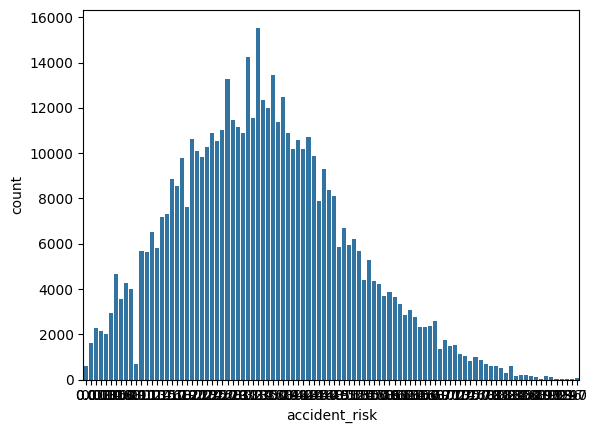

In [38]:
sns.countplot(x='accident_risk',data=df_train)

<Axes: xlabel='speed_limit', ylabel='count'>

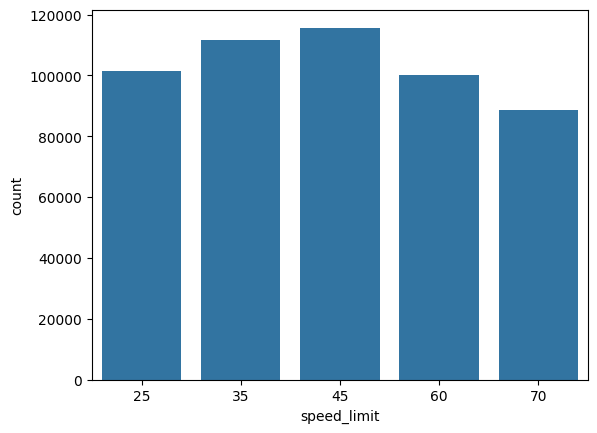

In [39]:
sns.countplot(x='speed_limit',data=df_train)

<Axes: xlabel='num_lanes', ylabel='count'>

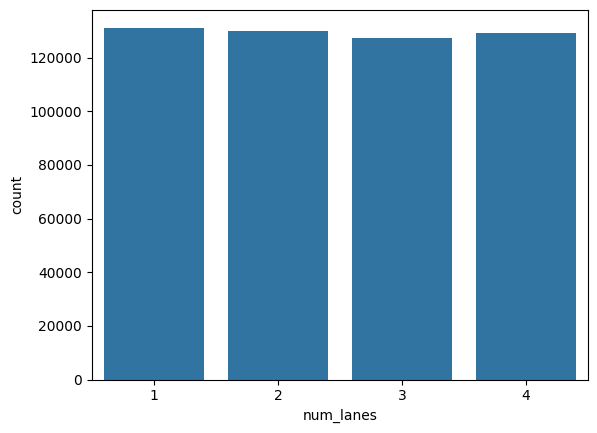

In [40]:
sns.countplot(x='num_lanes',data=df_train)

<Axes: xlabel='num_reported_accidents', ylabel='count'>

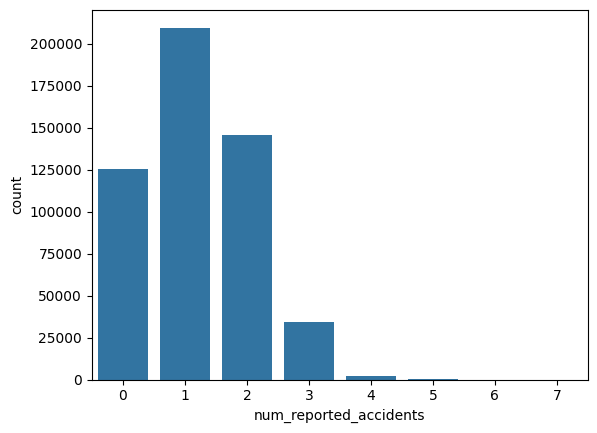

In [41]:
sns.countplot(x='num_reported_accidents',data=df_train)


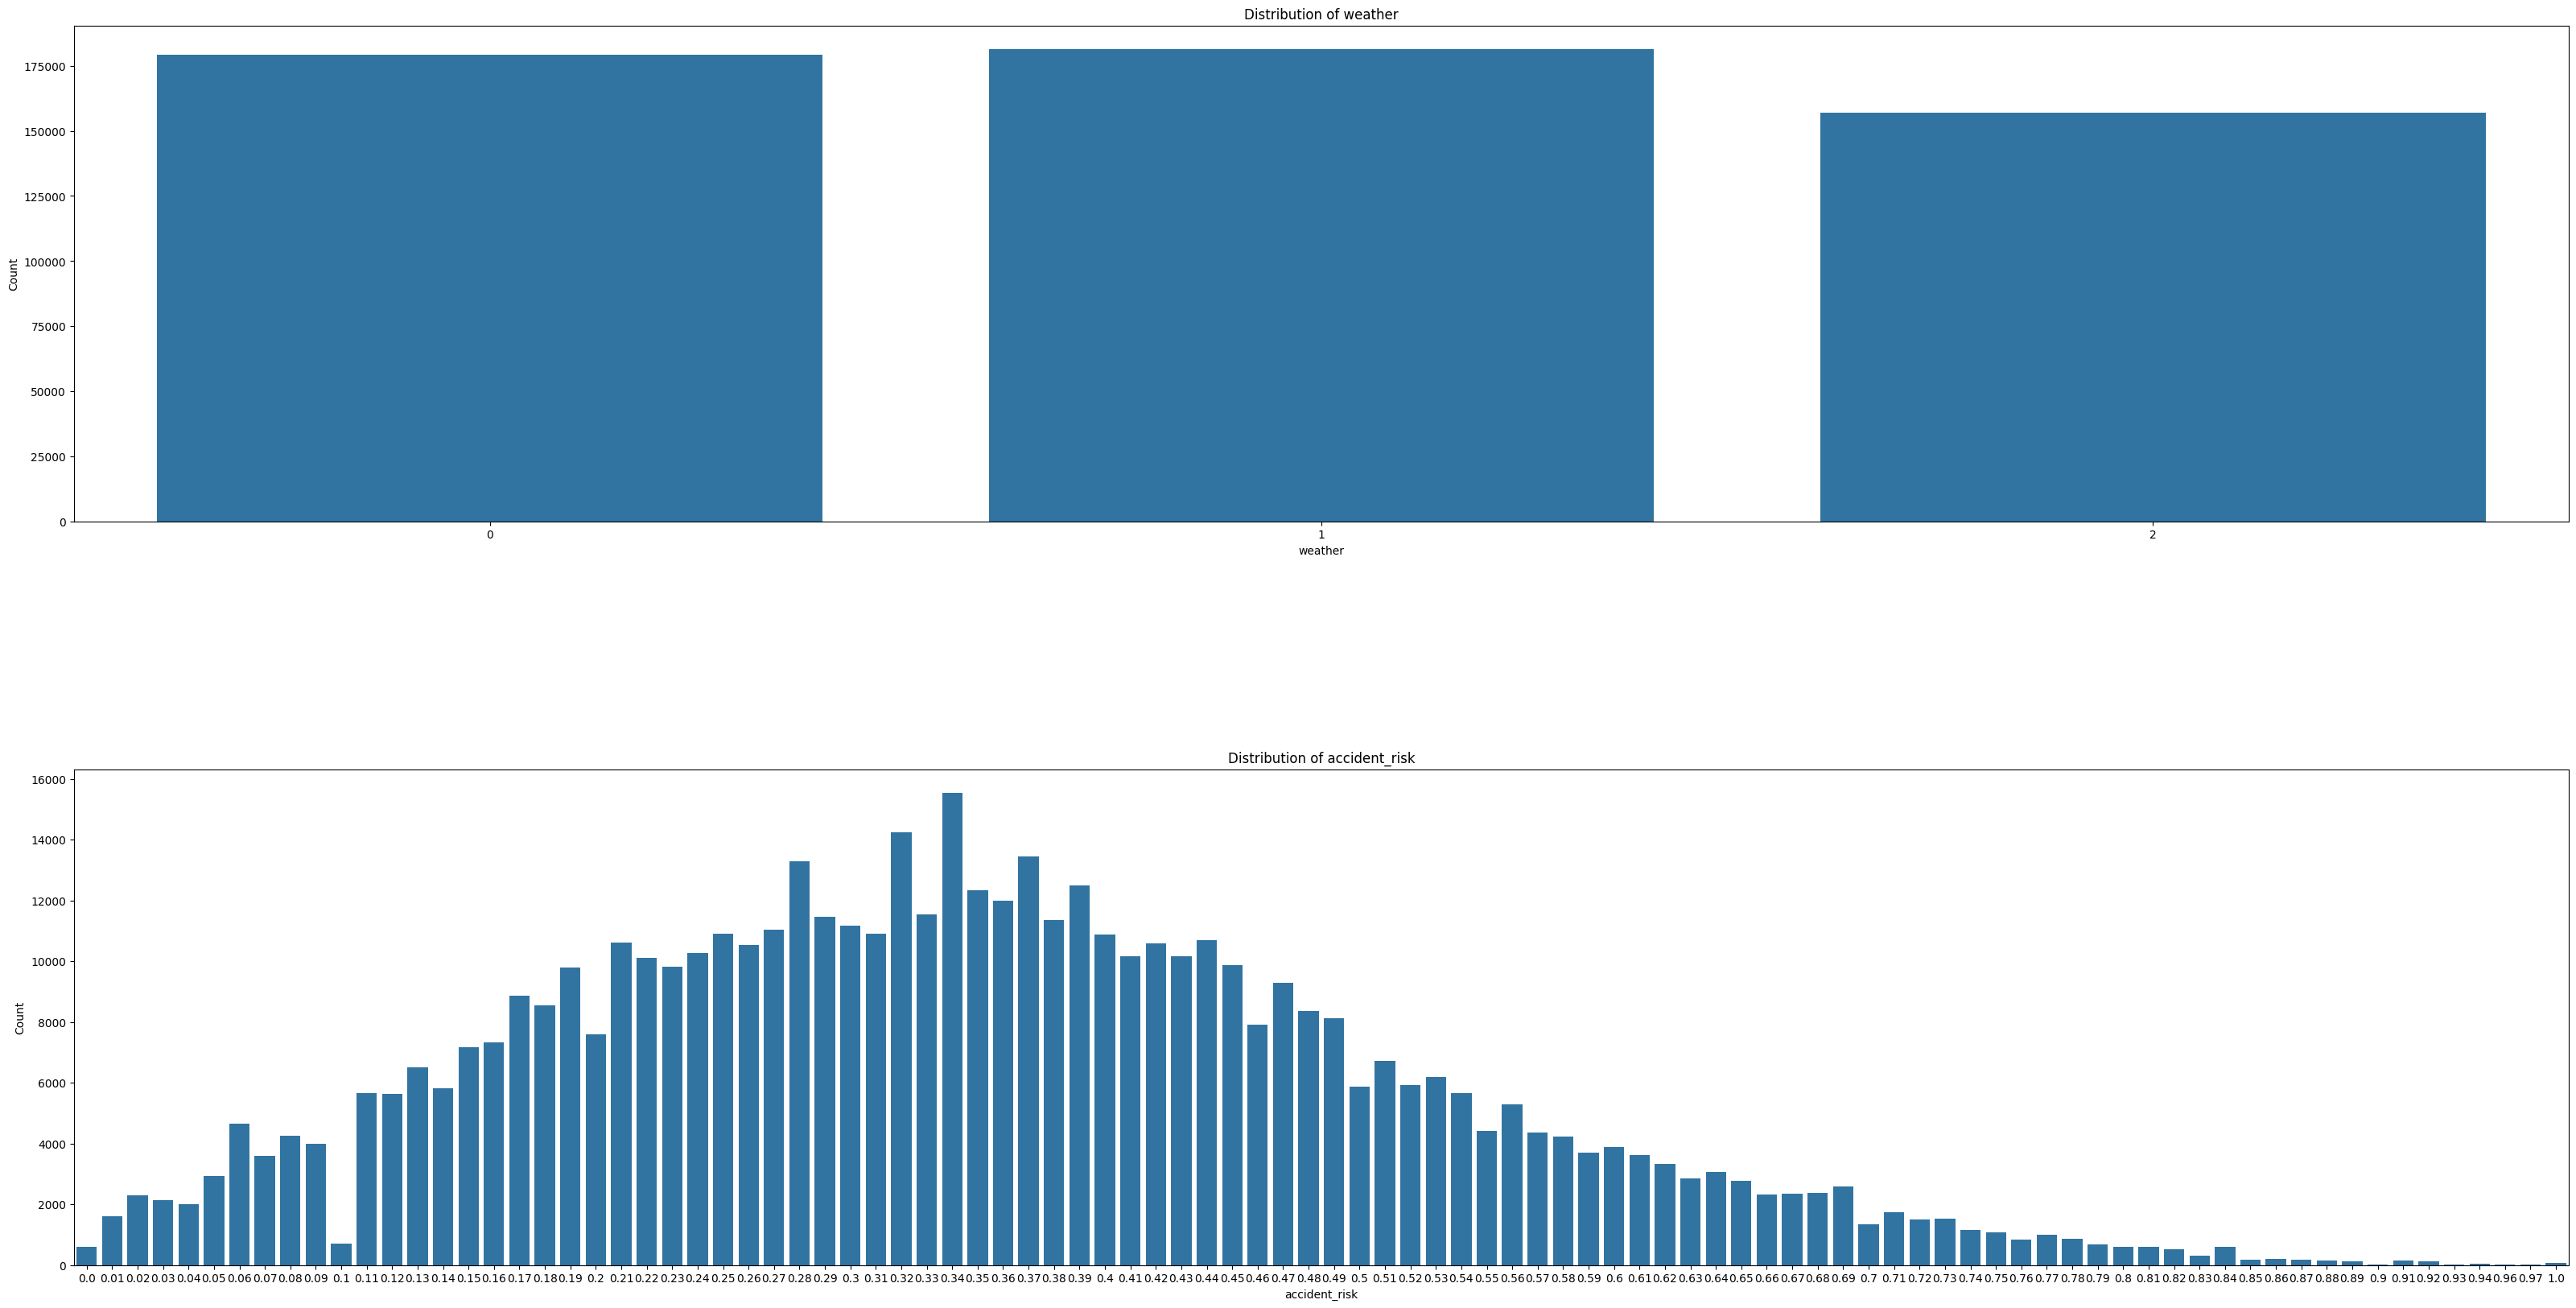

In [42]:
# List of categorical columns
categorical_columns = ['weather', 'accident_risk']  

# Set up the plotting grid
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(40, 10 * len(categorical_columns)))
plt.subplots_adjust(hspace=0.5)  # Adjust space between plots

# Plot count plots for each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df_train, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.show()

In [ ]:
pair_plot = sns.pairplot(df_train)  
plt.show()

In [ ]:
pair_plot = sns.pairplot(df_train)
pair_plot.savefig("pair_plot.png", dpi=300)  
plt.show()

In [ ]:
def MultiBoxplot(df, num_cols, f_cols=4, filename=None):
    f_rows = np.ceil(len(num_cols) / f_cols).astype(int)
    fig, axes = plt.subplots(f_rows, f_cols, figsize=(25, 17))
    
    color = ['blue', 'green','yellow', 'red', 'purple', 'orange', 'black']  # Define some colors for the plots
    axes = axes.flatten()
    
    for i, col in enumerate(num_cols):
        sns.boxplot(x=df[col], ax=axes[i], color=color[i % len(color)])
        axes[i].set_title(f'{col} Distribution')
        axes[i].set_facecolor('lightgrey')
        axes[i].grid(color='black', linestyle='-', linewidth=0.25)
    
    # Remove any empty subplots
    if len(num_cols) % f_cols != 0:
        for i in range(f_cols - len(num_cols) % f_cols):
            fig.delaxes(axes[-i-1])

    plt.tight_layout()

    # Save the plot if filename is provided
    if filename:
        plt.savefig(filename, dpi=300)  # Save as PNG file with 300 dpi resolution

    plt.show()

# List of columns you want to plot
selected_columns = ['public_road', 'road_signs_present',  'lighting', 'weather',
 'id','road_type', 'time_of_day', 'holiday','school_season','num_reported_accidents',                
'num_lanes','curvature', 'speed_limit','accident_risk']

# Call the function with the selected columns
MultiBoxplot(df=df_train, num_cols=selected_columns, filename="box_plots.png")

In [ ]:
def remove_outliers(df):
    numeric_cols = df[['public_road', 'road_signs_present',  'lighting', 'weather',
 'id','road_type', 'time_of_day', 'holiday','school_season','num_reported_accidents',                
'num_lanes','curvature', 'speed_limit']]

    # Calculate the first and third quartiles
    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Filter the data to remove rows with outliers
    df_filtered = df[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

    return df_filtered

# Apply the function to the training data
df_train = remove_outliers(df_train)

In [ ]:
def MultiBoxplot(df, num_cols, f_cols=4, filename=None):
    f_rows = np.ceil(len(num_cols) / f_cols).astype(int)
    fig, axes = plt.subplots(f_rows, f_cols, figsize=(25, 17))
    
    color = ['blue', 'green','yellow', 'red', 'purple', 'orange', 'black']  # Define some colors for the plots
    axes = axes.flatten()
    
    for i, col in enumerate(num_cols):
        sns.boxplot(x=df[col], ax=axes[i], color=color[i % len(color)])
        axes[i].set_title(f'{col} Distribution')
        axes[i].set_facecolor('lightgrey')
        axes[i].grid(color='black', linestyle='-', linewidth=0.25)
    
    # Remove any empty subplots
    if len(num_cols) % f_cols != 0:
        for i in range(f_cols - len(num_cols) % f_cols):
            fig.delaxes(axes[-i-1])

    plt.tight_layout()

    # Save the plot if filename is provided
    if filename:
        plt.savefig(filename, dpi=300)  # Save as PNG file with 300 dpi resolution

    plt.show()

# List of columns you want to plot
selected_columns = ['public_road', 'road_signs_present',  'lighting', 'weather',
 'id','road_type', 'time_of_day', 'holiday','school_season','num_reported_accidents',                
'num_lanes','curvature', 'speed_limit','accident_risk']

# Call the function with the selected columns
MultiBoxplot(df=df_train, num_cols=selected_columns, filename="box_plots.png")

In [ ]:
corr_matrix = df_train.corr()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Features and Target variables  

In [ ]:
y = df_train.accident_risk

features = ['public_road', 'road_signs_present',  'lighting', 'weather',
 'id','road_type', 'time_of_day', 'holiday','school_season','num_reported_accidents',                
'num_lanes','curvature', 'speed_limit']

X = df_train[features]
X.head()

In [ ]:
#test train split 
from sklearn.model_selection import train_test_split
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(train_X)
X_test_scaled = sc.transform(val_X)

In [ ]:
X_train_scaled

In [ ]:
X_test_scaled

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
#Define a list of models to train and compare
models = [
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42))
]

# Train and evaluate each model
for name, model in models:
    model.fit(train_X, train_y)
    y_pred = model.predict(val_X)
    mse = mean_squared_error(val_y, y_pred)
    r2 = r2_score(val_y, y_pred)
    print(f'{name}: MSE = {mse:.2f}, R2 = {r2:.2f}')

In [ ]:
rf = RandomForestRegressor()
rf.fit(train_X, train_y)
y_pred = rf.predict(val_X)
print(mean_squared_error(val_y, y_pred))
print(r2_score(val_y,y_pred))

from sklearn.metrics import mean_absolute_error
rf_val_mae = mean_absolute_error(y_pred, val_y)
print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

In [ ]:
# print the top few validation predictions

print(rf.predict(val_X.head()))
# print the top few actual ages from validation data
print(val_y.head())

In [ ]:
val_mae = rf.predict(val_X)

print( mean_absolute_error(val_y, y_pred))

In [ ]:
test_X = df_test[features]
test_preds = rf.predict(test_X)


output = pd.DataFrame({'id': df_test.id,
                       'accident_risk': test_preds})
output.to_csv('submission1.csv', index=False)